<a href="https://colab.research.google.com/github/AmishaSharma12002/JP_morgan_forageTask1/blob/main/Task1JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(path):
    fileC = pd.read_csv(path)
    df = pd.DataFrame(fileC)
    return df

def exercise_1(df):
    print(df.columns.values.tolist())

def exercise_2(df, k):
    firz = df.head(k)
    return firz

def exercise_3(df, k):
    ran=df.sample(k)
    return ran


def exercise_4(df):
    res = df['type'].unique()
    res = res.tolist()
    return res

def exercise_5(df):
    top_10_destinations = df['nameDest'].value_counts().head(10)
    return top_10_destinations

def exercise_6(df):
    fraud_detected_rows = df[df['isFraud'] == 1]
    return fraud_detected_rows

def exercise_7(df):
    grouped_data = df.groupby('nameOrig')['nameDest'].nunique().reset_index()
    sorted_data = grouped_data.sort_values(by='nameDest', ascending=False)
    sorted_data.reset_index(drop=True, inplace=True)
    return sorted_data

def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()
    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequencies')
    axs[0].set_xlabel('Type of Transaction')
    axs[0].set_ylabel('Occurance')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Frequencies: split by Fraud')
    axs[1].set_xlabel('Type: fraud')
    axs[1].set_ylabel('Occurance')
    fig.suptitle('Fraud')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The data plot reveals several important findings. Firstly, fraud occurrences are limited to CASH OUT and TRANSFER transactions exclusively. Additionally, the frequency of fraud in these categories is relatively low, with only 75 and 72 instances, respectively. On the contrary, all CASH IN, PAYMENT, and DEBIT transactions seem to be non-fraudulent.'

def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Scatter plot for Cash Out transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'A cash-out transaction indicates that a client is withdrawing money. As observed, all the activity is confined to the first two quadrants, which implies that our data is appropriately organized and structured.'


def exercise_custom(df):
    return df[['isFlaggedFraud', 'isFraud']].value_counts()

def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,4))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud detection')
    ax.set_xlabel('isFlaggedFraud, isFraud')
    ax.set_ylabel('Occurrence')
    return

# task 0
path="/content/drive/MyDrive/Dataset/transactions.csv"
df = exercise_0(path)



In [5]:
# task 1
print()
print("-----Task1-----")
print()
exercise_1(df)


-----Task1-----

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [6]:
# task 2
print()
print("-----Task2-----")
print()
n =int(input("Enter value for K(rows):"))
print(exercise_2(df,n))


-----Task2-----

Enter value for K(rows):10
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0

In [7]:
# task 3
print()
print("-----Task3-----")
print()
n = int(input("Enter value for K(rows):"))
print(exercise_2(df,n))



-----Task3-----

Enter value for K(rows):10
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0

In [8]:
#task 4
print()
print("-----Task4-----")
print()
print(exercise_4(df))


-----Task4-----

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']


In [9]:
#task 5
print()
print("-----Task5-----")
print()
print(exercise_5(df))



-----Task5-----

C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: nameDest, dtype: int64


In [10]:
#task 6
print()
print("-----Task6-----")
print()
print(exercise_6(df))



-----Task6-----

        step      type      amount     nameOrig  oldbalanceOrg  \
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
251        1  TRANSFER     2806.00  C1420196421        2806.00   
252        1  CASH_OUT     2806.00  C2101527076        2806.00   
680        1  TRANSFER    20128.00   C137533655       20128.00   
...      ...       ...         ...          ...            ...   
182862    13  CASH_OUT      408.00  C1894004688         408.00   
193765    13  TRANSFER    48375.02   C920803432       48375.02   
193766    13  CASH_OUT    48375.02  C1894578299       48375.02   
196775    13  TRANSFER  4022667.54   C735463888     4022667.54   
196776    13  CASH_OUT  4022667.54    C79951219     4022667.54   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                  0.0   C553264065            0.00            0.00        1   
3                  0.0    C38

In [11]:
#task 7
print()
print("-----Task7-----")
print()
print(exercise_7(df))


-----Task7-----

           nameOrig  nameDest
0        C745009740         2
1        C260230637         2
2         C44568807         2
3       C1709295811         2
4        C361604284         1
...             ...       ...
199991  C1648185402         1
199992  C1648194899         1
199993  C1648216508         1
199994  C1648222711         1
199995   C999983894         1

[199996 rows x 2 columns]
None



-----Task8-----



'The data plot reveals several important findings. Firstly, fraud occurrences are limited to CASH OUT and TRANSFER transactions exclusively. Additionally, the frequency of fraud in these categories is relatively low, with only 75 and 72 instances, respectively. On the contrary, all CASH IN, PAYMENT, and DEBIT transactions seem to be non-fraudulent.'

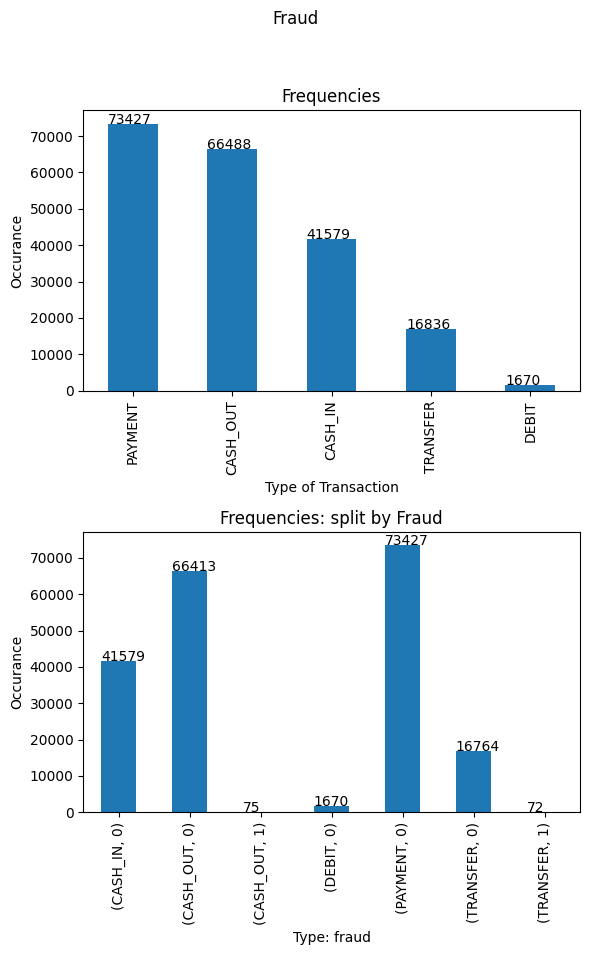

In [14]:
#task 8
print()
print("-----Task8-----")
print()
visual_1(df)



-----Task9-----



'A cash out refers to a client withdrawing money.  As you can see, activity is only in the first two quadrantssuggesting that our data is structured correctly. '

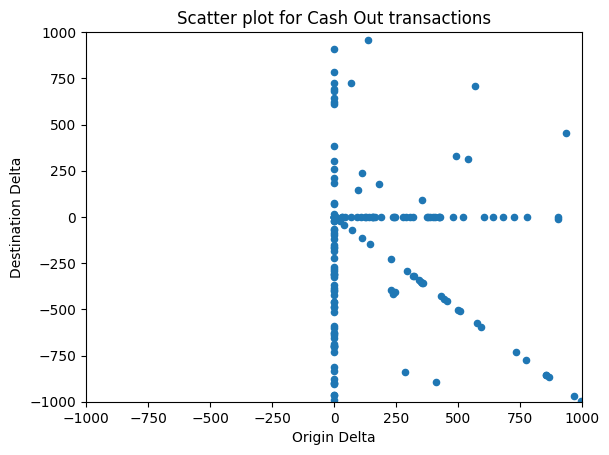

In [17]:
#task 9
print()
print("-----Task9-----")
print()
visual_2(df)

<Axes: >

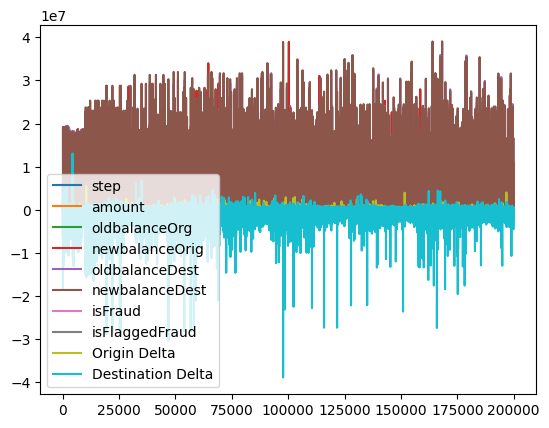

In [18]:
df.plot()


-----Task10-----

From the observation, it is evident that the flagged fraud does not encompass all actual instances of fraud.


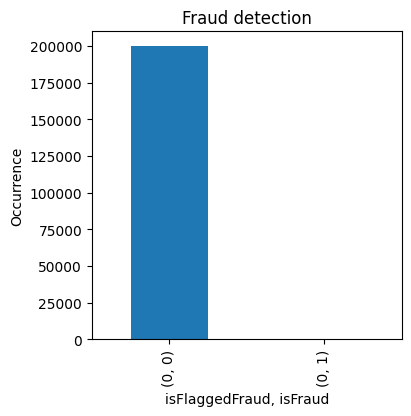

In [21]:
#task 10
print()
print("-----Task10-----")
print()
print("From the observation, it is evident that the flagged fraud does not encompass all actual instances of fraud.")
visual_custom(df)